In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel("Telco_customer_churn_adapted_v2.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [3]:
df.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

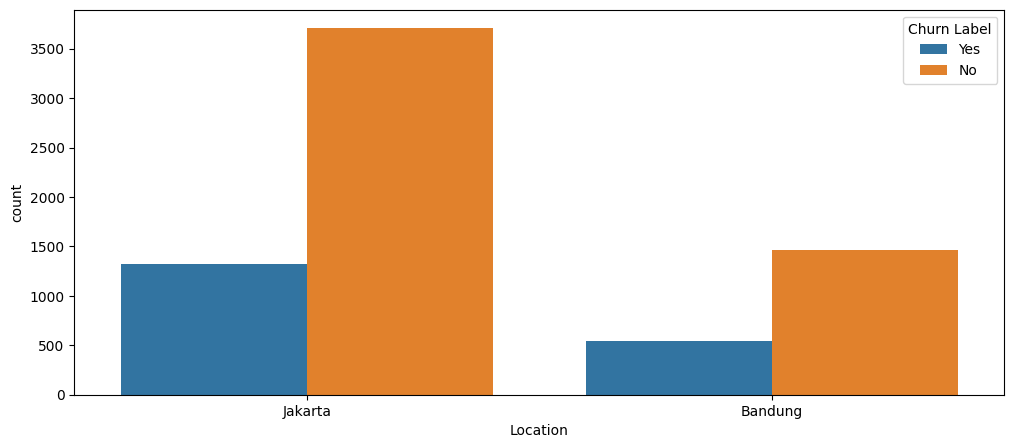

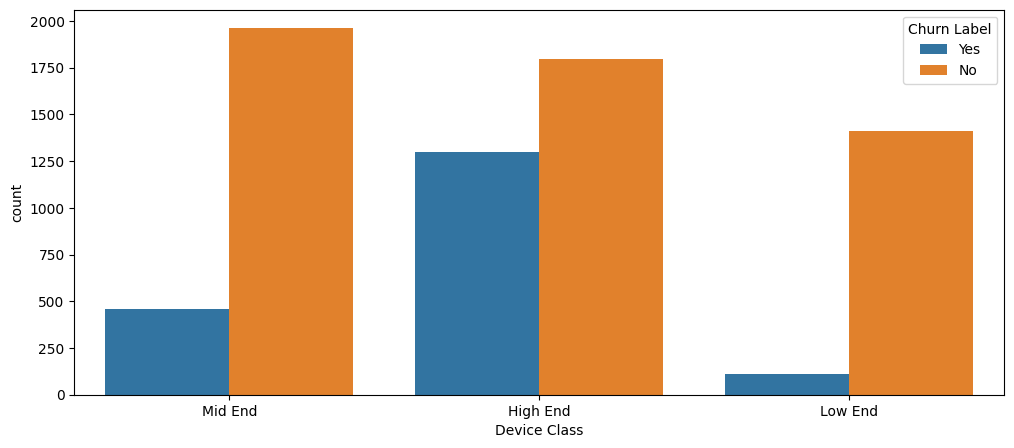

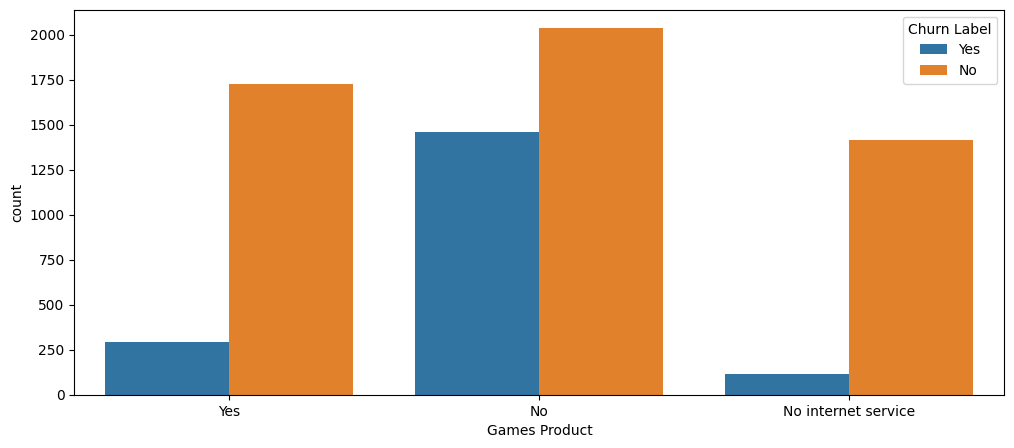

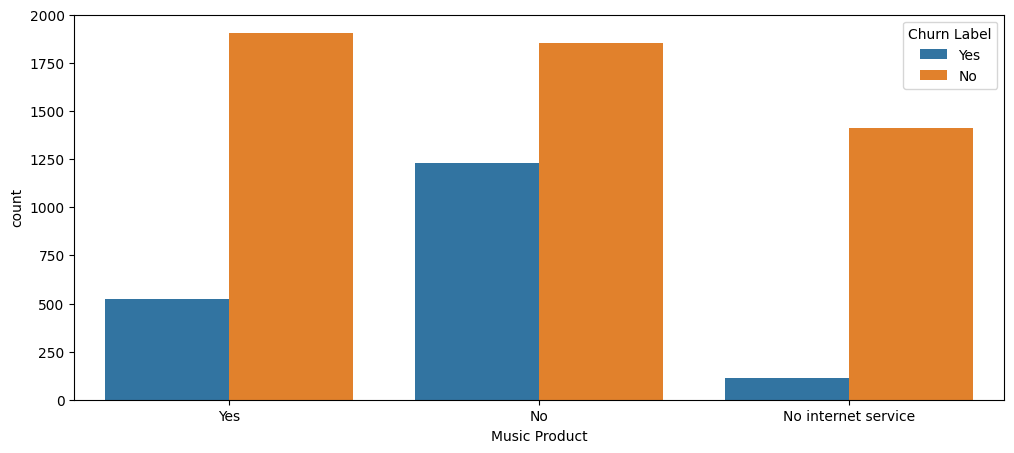

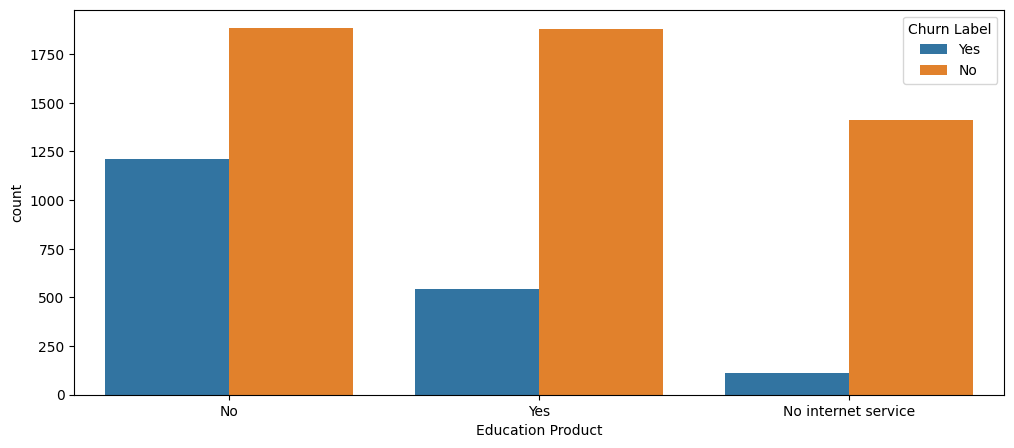

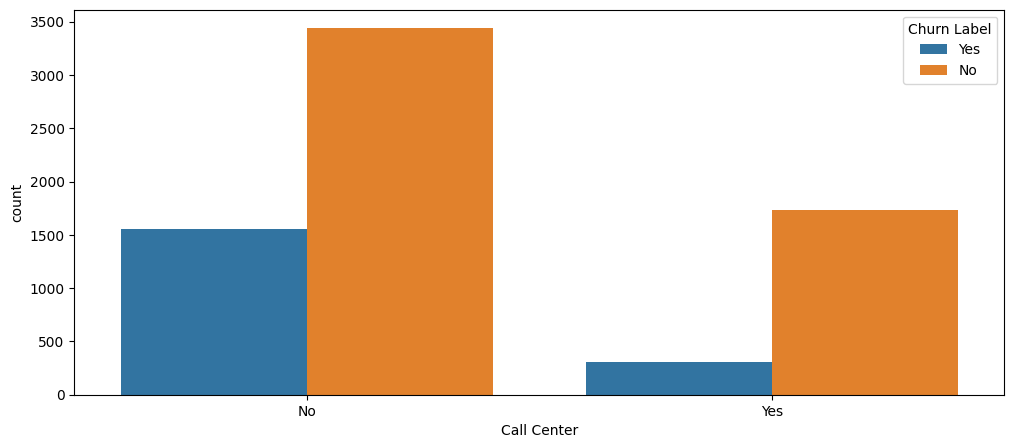

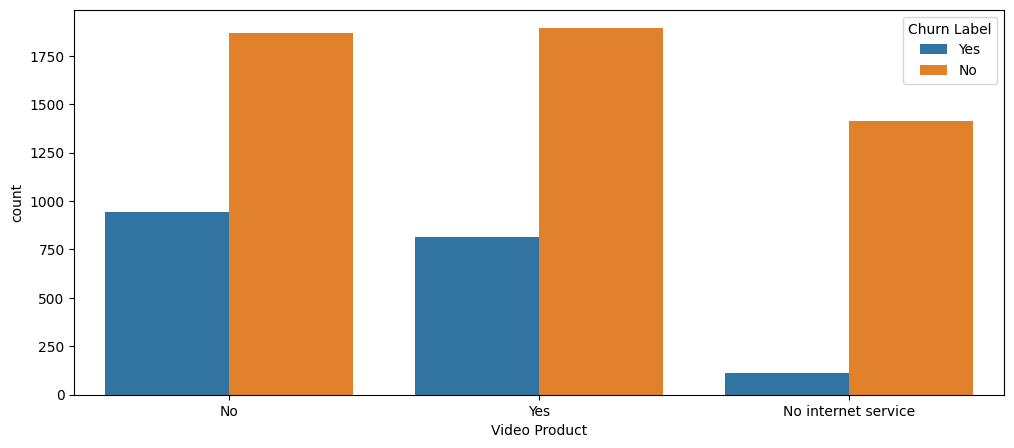

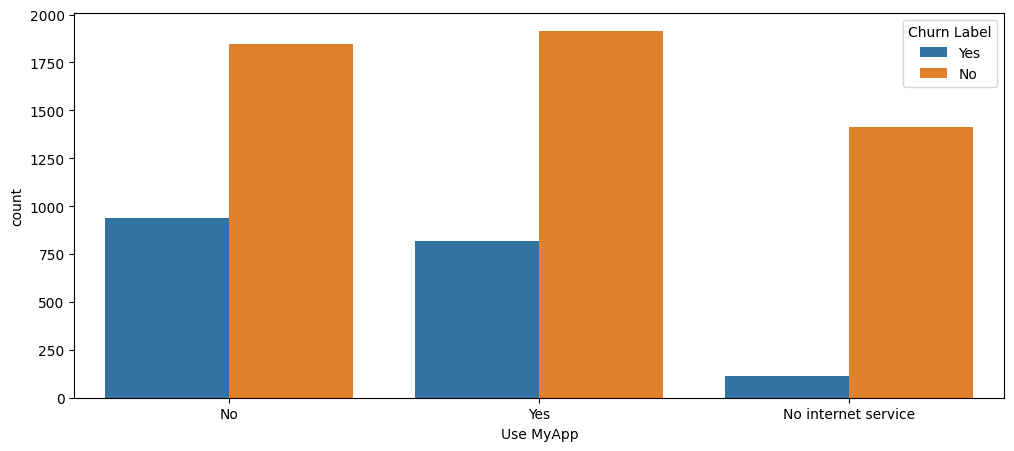

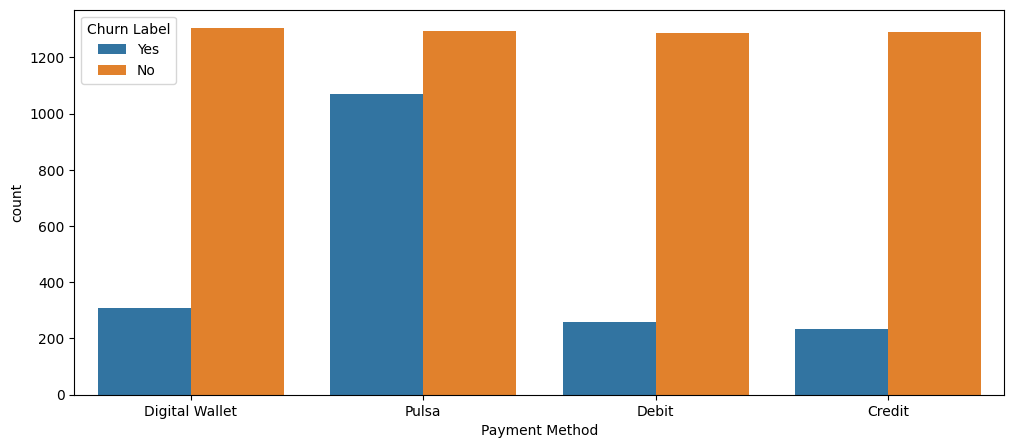

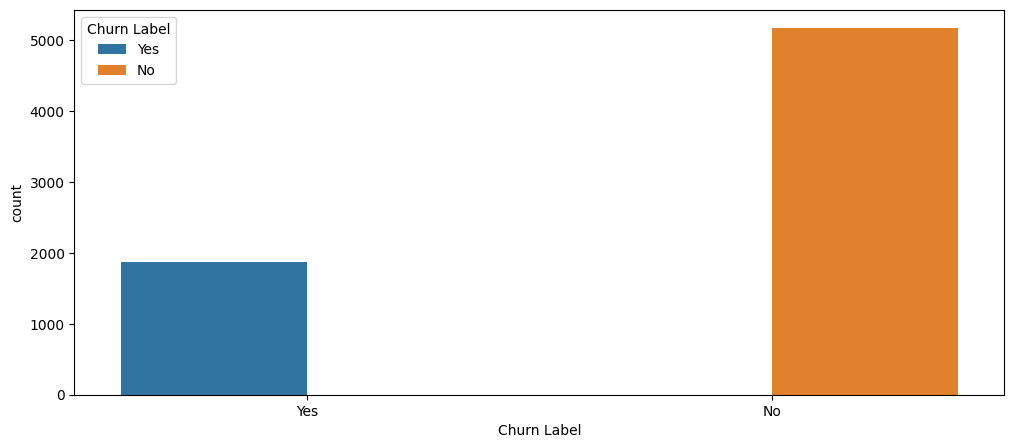

In [6]:
# plot cat features vs target
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(12,5))
        sns.countplot(x=i, hue='Churn Label', data=df)
        plt.xlabel(i)
        plt.show()

<h3> First time analysis Categorical Features with Target</h3>

* Customer who lives in Jakarta have a tendency to churn than customer who lives in Bandung
* Customer who using High End Device have a highest possibility to churn than another customer with mid or low end device. 
* Customer who not uses internet service for game product have a highest possibility to churn than another customer. From this information, we suppose : 
    * the internet service have a good performance for customer who like playing game.
* Customer who not uses internet service for music product have a highest possibility to churn than another customer.
* Customer who not uses internet service for education product have a highest possibility to churn than another
* Customer who not uses call center service have a tendency to churn than customer who use call center service. From this information, we suppose :
    * The customer doesn't know how to uses call center service, this indicate they are churn
    * The call center service itself cannot help customer solve their problem, this indicate some customers who uses call center still churn    
* Both customer who uses and not uses video product have a tendency to churn
* Both customer who uses and not uses myApp service have a tendency to churn
* Customer who use pulsa as payment method have a highest possibility to churn than another customer. We suppose :
    * The customer encounter loss their pulsa when the internet services is on (normal situation)




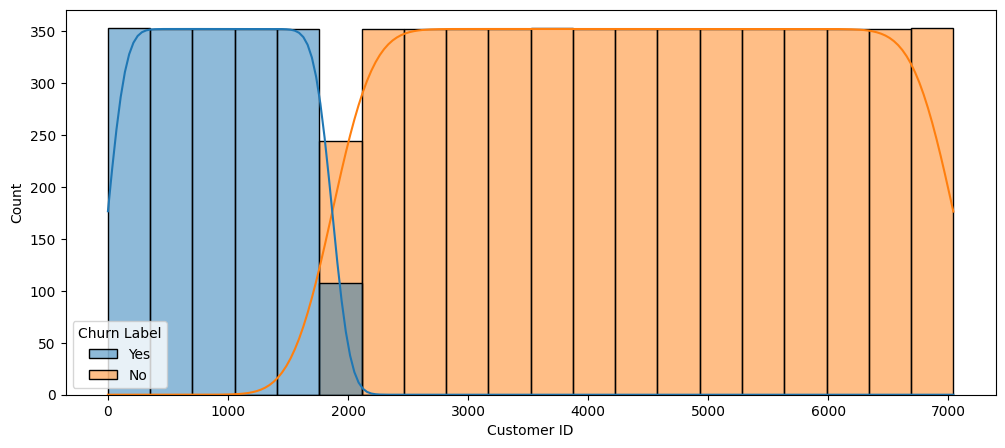

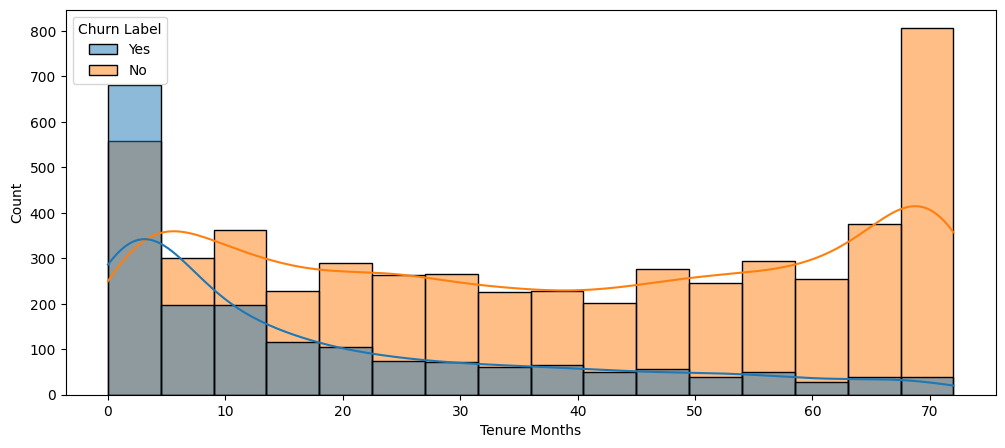

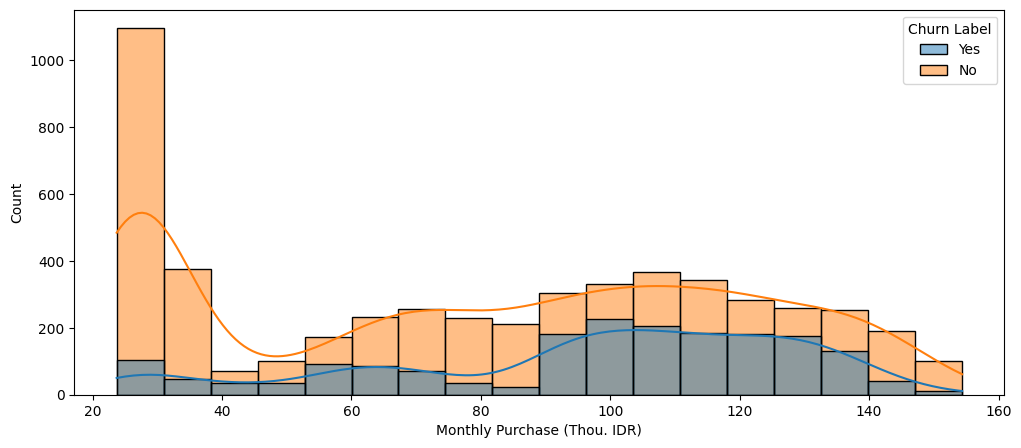

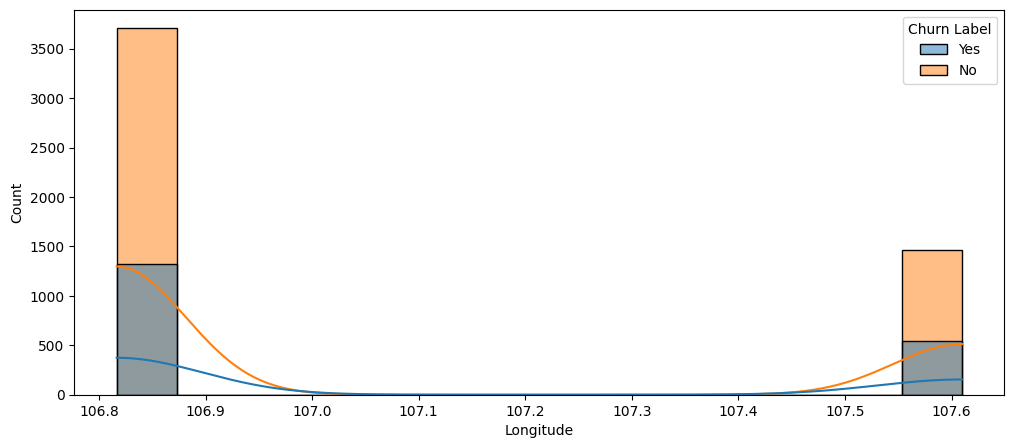

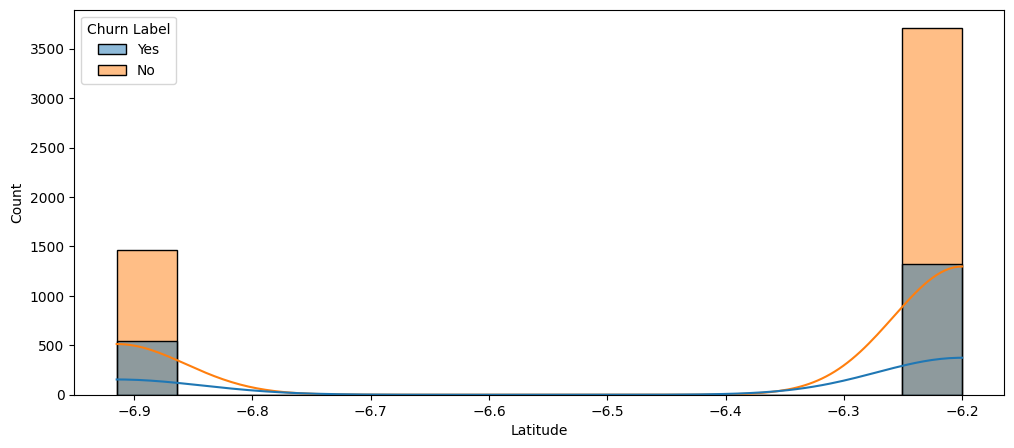

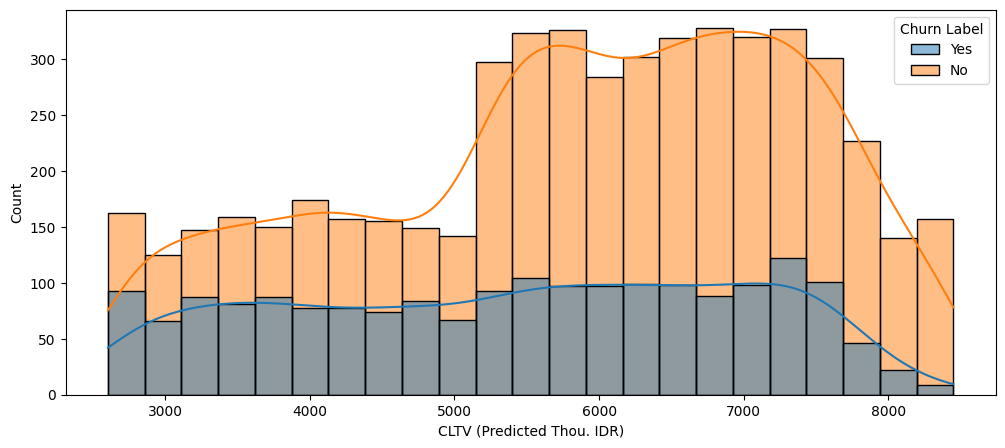

In [7]:
# plot numerical features vs target
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(12,5))
        sns.histplot(x=i, hue='Churn Label', data=df, kde=True)
        plt.xlabel(i)
        plt.show()

<h3> First time numerical feature with target </h3>

* Among the customers in the dataset, 26.5% of customers are in churn and have stopped using the company's services
* Geography of the customers according to longitude and latitude just represent two city not every district in the city.
* 50% of the customers who left the service did so in the first 10 months. The number of clients in the churn ceases to decline sharply after 5 months in the service.
* The client's lifetime before the churn is very important information, Usually the first months in the service are the most risky, since customers may have their own expectations from the service and so on
* Customers with higher tenure months tend to stay with the company.

Let's deep dive explore the data.

In [8]:
df.groupby('Churn Label')['Customer ID'].nunique()
 

Churn Label
No     5174
Yes    1869
Name: Customer ID, dtype: int64

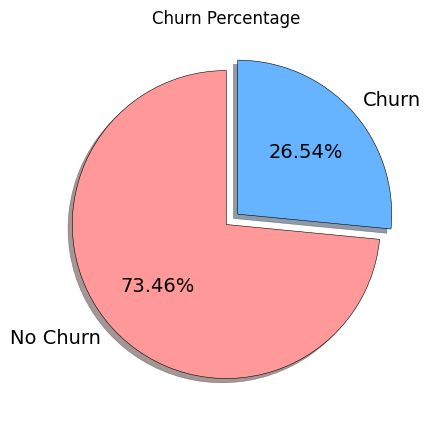

In [9]:
plt.figure(figsize=(5,5))
plt.pie(df.groupby('Churn Label')['Customer ID'].nunique(), 
        labels=['No Churn', 'Churn'], 
        autopct='%.2f%%', 
        explode=[0,0.1], 
        shadow=True,
        startangle=90, 
        textprops={'fontsize': 14},
        colors=['#ff9999','#66b3ff'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.4}
        )
plt.title('Churn Percentage')
plt.show()



Customer's lifetime in the service

In [10]:
df.groupby('Churn Label')['Tenure Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


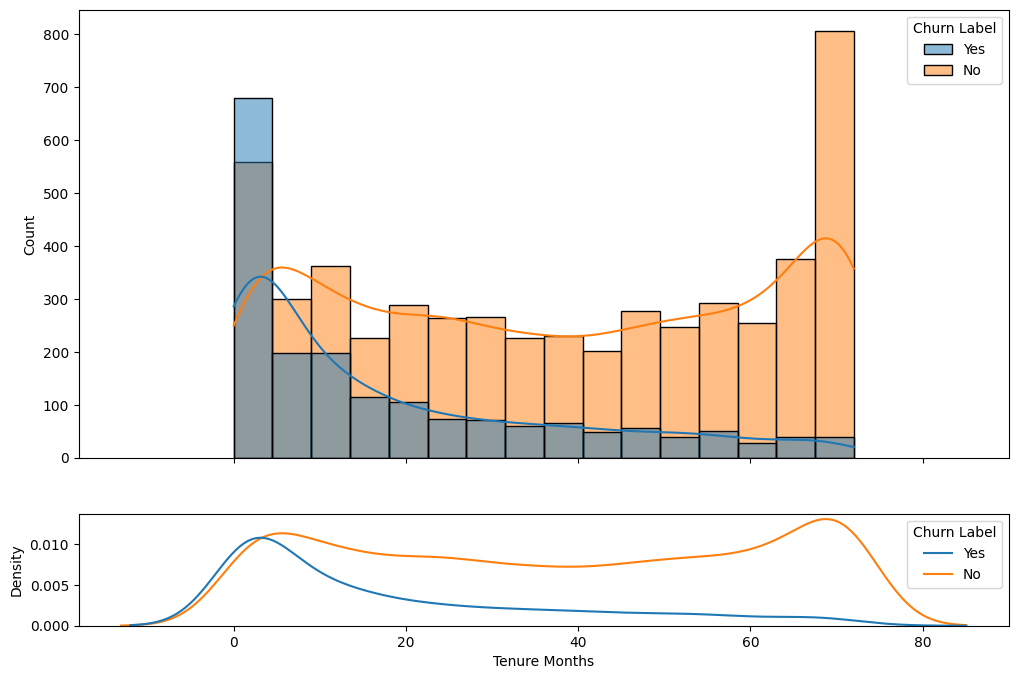

In [11]:
fig, (ax_hist, ax_kde) = plt.subplots(2, sharex=True, figsize=(12,8), gridspec_kw={"height_ratios": (.8, .2)})
sns.histplot(x='Tenure Months', hue='Churn Label', data=df, kde=True, ax=ax_hist)
sns.kdeplot(x='Tenure Months', hue='Churn Label', data=df, ax=ax_kde)
plt.xlabel('Tenure Months')
plt.show()


<Figure size 1200x500 with 0 Axes>

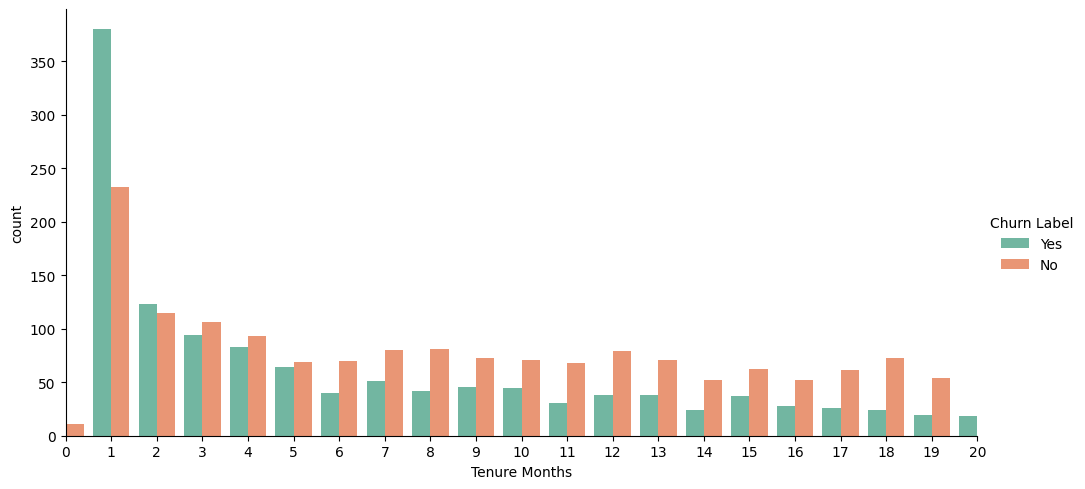

In [12]:
# plot churn vs tenure zoom into 0-20 months
plt.figure(figsize=(12,5))
sns.catplot(x='Tenure Months', hue='Churn Label', data=df, kind='count', height=5, aspect=2, palette='Set2')
plt.xlabel('Tenure Months')
plt.xlim(0,20)
plt.show()

Well, we know that in general 26.5% of customers have stopped using our service and 50% of such customers have used our service for 10 months or less.

Now, how about monthly purchase by customer

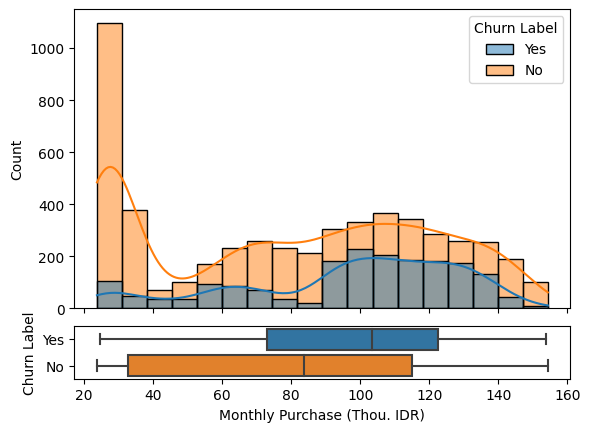

In [13]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

sns.histplot(data=df, x="Monthly Purchase (Thou. IDR)", hue="Churn Label", ax=ax_hist, kde=True)
ax_hist.set_xlabel("") 

sns.boxplot(data=df, x="Monthly Purchase (Thou. IDR)", y="Churn Label", ax=ax_box)
ax_box.set_xlabel("Monthly Purchase (Thou. IDR)") 
plt.subplots_adjust(hspace=0.1)

plt.show()

In [14]:
df.groupby('Churn Label')['Monthly Purchase (Thou. IDR)'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,79.644661,40.420443,23.725,32.630,83.7525,114.92,154.375
Yes,1869.0,96.773732,32.065869,24.505,72.995,103.5450,122.46,153.855


The median monthly charges of customers who have left the service are higher than those of customers who are still active. This might be due to certain services. We will explore later

Let's check how CLTV with Churn Label work

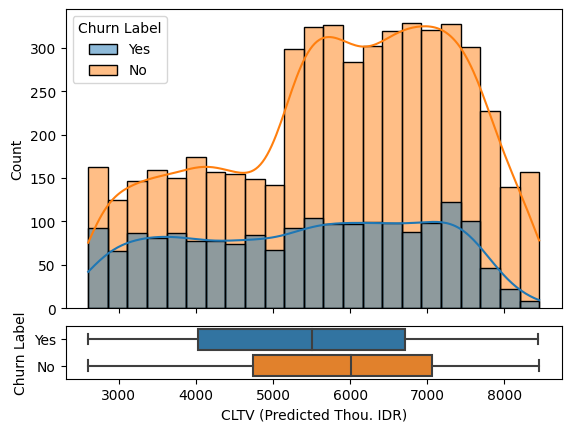

In [18]:
# plot churn vs CLTV
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})
sns.histplot(data=df, x="CLTV (Predicted Thou. IDR)", hue="Churn Label", ax=ax_hist, kde=True)
ax_hist.set_xlabel("")
sns.boxplot(data=df, x="CLTV (Predicted Thou. IDR)", y="Churn Label", ax=ax_box)
ax_box.set_xlabel("CLTV (Predicted Thou. IDR)")
plt.subplots_adjust(hspace=0.1)
plt.show()


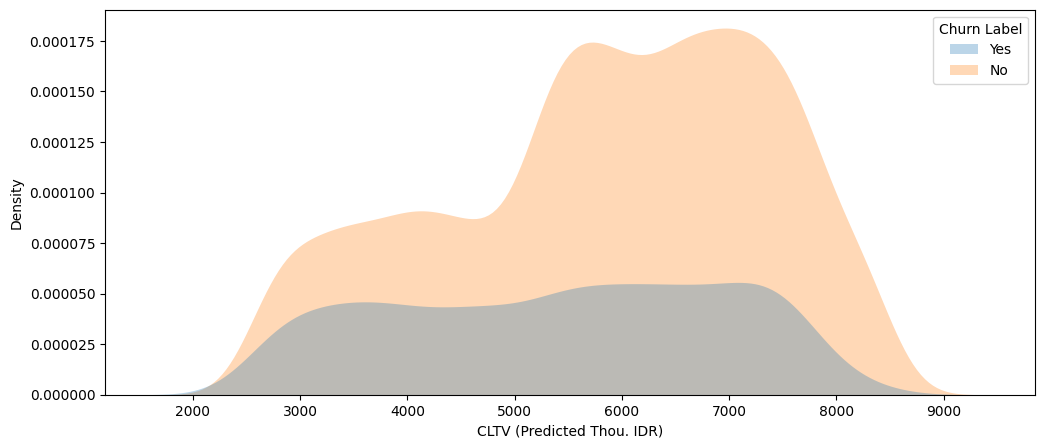

In [21]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df, x="CLTV (Predicted Thou. IDR)", hue="Churn Label", fill=True, alpha=.3, linewidth=0)
plt.xlabel("CLTV (Predicted Thou. IDR)")
plt.show()

In [22]:
df.groupby('Churn Label')['CLTV (Predicted Thou. IDR)'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,5838.197739,1518.014157,2603.9,4736.875,6006.0,7065.175,8450.0
Yes,1869.0,5394.239058,1546.181920,2603.9,4031.300,5509.4,6715.800,8429.2


From the visualisation above, customer who not to be churn have a higher value in the start, we suppose because they are OK with the services and use all of them. But we need to explore it more later. The information is normal, customer with tendency to be churn have a smaller CLTV than loyal customer

<h3> Analysis from feature with feature </h3>


In [24]:
df_corr = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_corr.columns:
    if df_corr[i].dtype == 'object':
        df_corr[i] = le.fit_transform(df_corr[i])

df_corr.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,1,2,2,2,0,0,0,0,2,70.005,1,106.816666,-6.2,4210.7
1,1,2,1,0,0,0,0,0,0,0,3,91.910,1,106.816666,-6.2,3511.3
2,2,8,1,0,0,0,2,0,2,2,3,129.545,1,106.816666,-6.2,6983.6
3,3,28,1,0,0,0,2,1,2,2,3,136.240,1,106.816666,-6.2,6503.9
4,4,49,1,0,0,2,2,0,2,2,1,134.810,1,106.816666,-6.2,6942.0


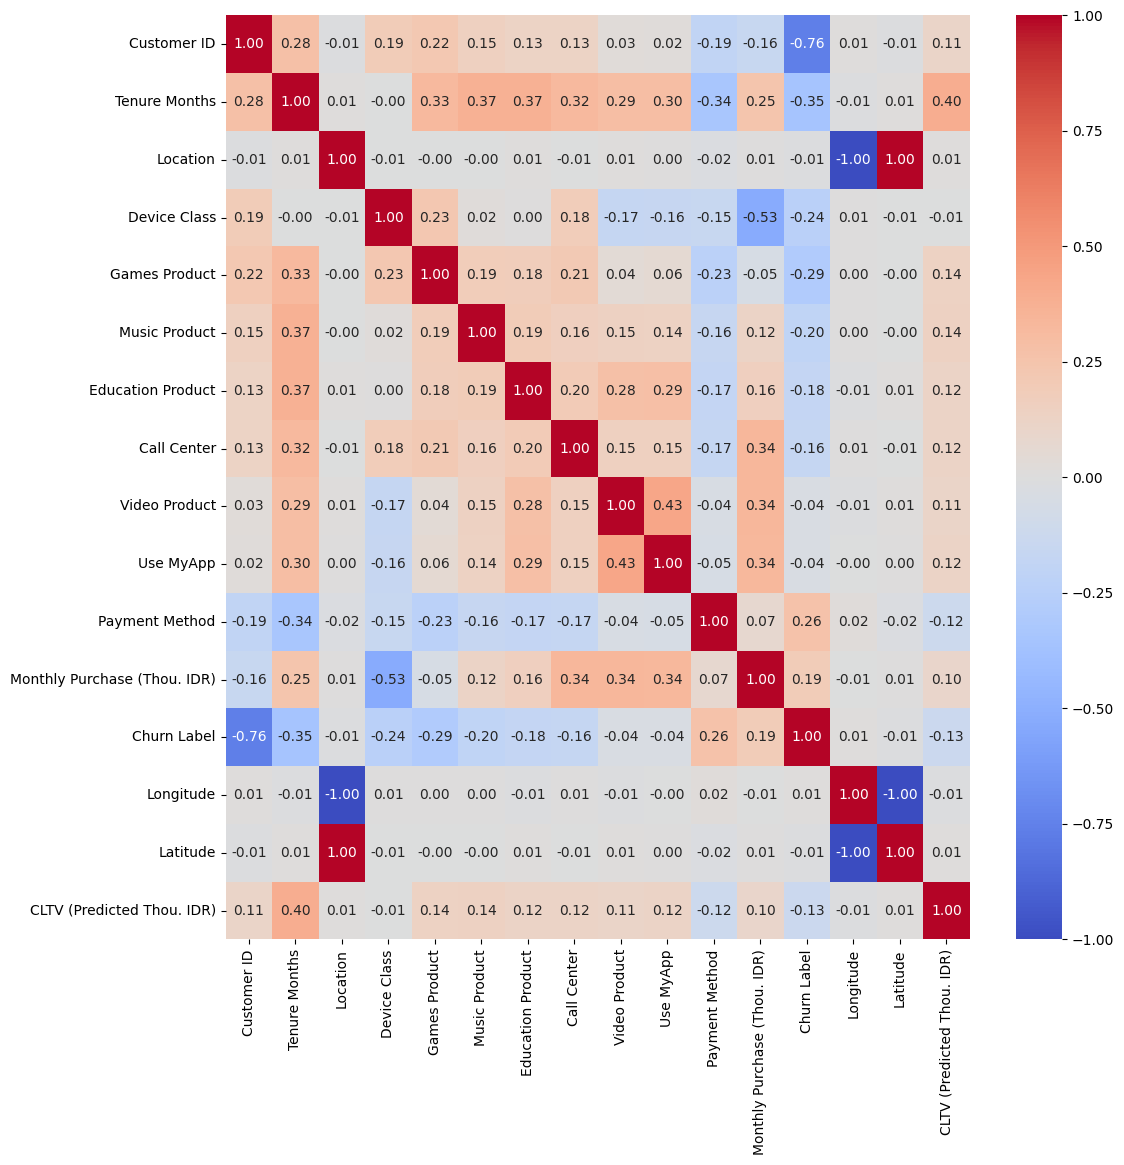

In [31]:
# plot df corr matrix, batasan 2 digit di belakang koma
plt.figure(figsize=(12,12))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<h3>Brief Analysis From Correlation Matrix</h3>
this analysis would be determine how the way of analysis later

POSITIVE CORR :
* Tenure Months features have a strong correlation with CLTV, Monthly Purchase, and all of the product
* Device class have a strong correlation with call center and game product
* All of product have a correlation each other. Also have strong correlation with Tenure Months. A Bit correlation with CLTV and exponent correlation with Monthly Purchase start from Games-Use MyApp.

* Payment Method have a strong correlation with target
* Monthly Purchase have a bit correlation with CLTV and churn label
* Churn label have strong correlation with monthly purchase and payment method
* CLTV have a strong correlation with Tenure Months, and a bit with all of product then Monthly Purchase

NEGATIVE CORR :
* Tenure Months have a negative correlation with Churn Label and Payment method
* Device Class have a Strong Negative Correlation with Churn Label, Monthly Purchase. Then, have a bit corr with payment method, use my app and video product.
* Games Product have a Strong Neg corr with Churn label and payment method
* Music, Education, Call Center also have some neg corr with churn label and payment method
* Video product and Use MyApp with Device class
* Payment method with tenure months, device class, and all of product service
* Monthly Purchase with Device Class (What? anomaly?)
* Churn label with Tenure Month, then all of product service and CLTV
* CLTV only with Churn label and Payment Method



we need to see :

* tenure months + monthly purchase vs churn label
* tenure + cltv vs churn label
* tenure + all of product vs label

C:\Users\Kresna\AppData\Local\Temp\ipykernel_25876\3464614302.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_corr['Tenure Months'], y=df_corr['Monthly Purchase (Thou. IDR)'], hue=df['Churn Label'], ci=None, palette='magma')


<Axes: xlabel='Tenure Months', ylabel='Monthly Purchase (Thou. IDR)'>

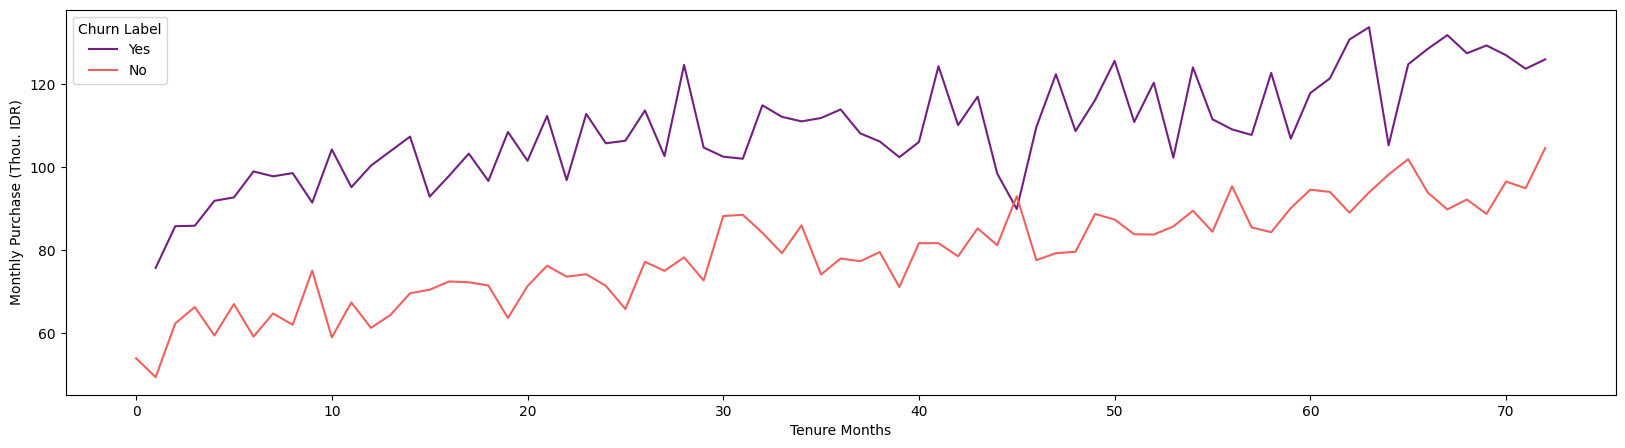

In [34]:
# tenure months + monthly purchase vs churn
plt.figure(figsize=(20,5))
sns.lineplot(x=df_corr['Tenure Months'], y=df_corr['Monthly Purchase (Thou. IDR)'], hue=df['Churn Label'], ci=None, palette='magma')


It show how the customer with high monthly purchase have a tendency to churn. We need explore why become like this

C:\Users\Kresna\AppData\Local\Temp\ipykernel_25876\2180220228.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_corr['Tenure Months'], y=df_corr['CLTV (Predicted Thou. IDR)'], hue=df['Churn Label'], ci=None, palette='rocket')


<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

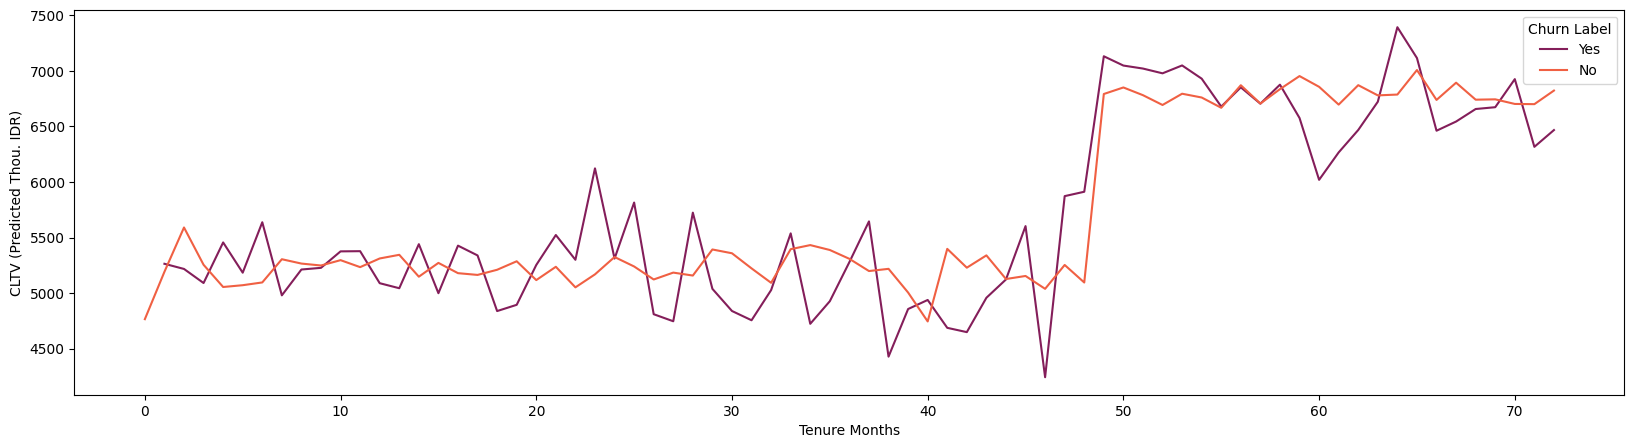

In [55]:
# tenure months + cltv vs churn
plt.figure(figsize=(20,5))
sns.lineplot(x=df_corr['Tenure Months'], y=df_corr['CLTV (Predicted Thou. IDR)'], hue=df['Churn Label'], ci=None, palette='rocket')


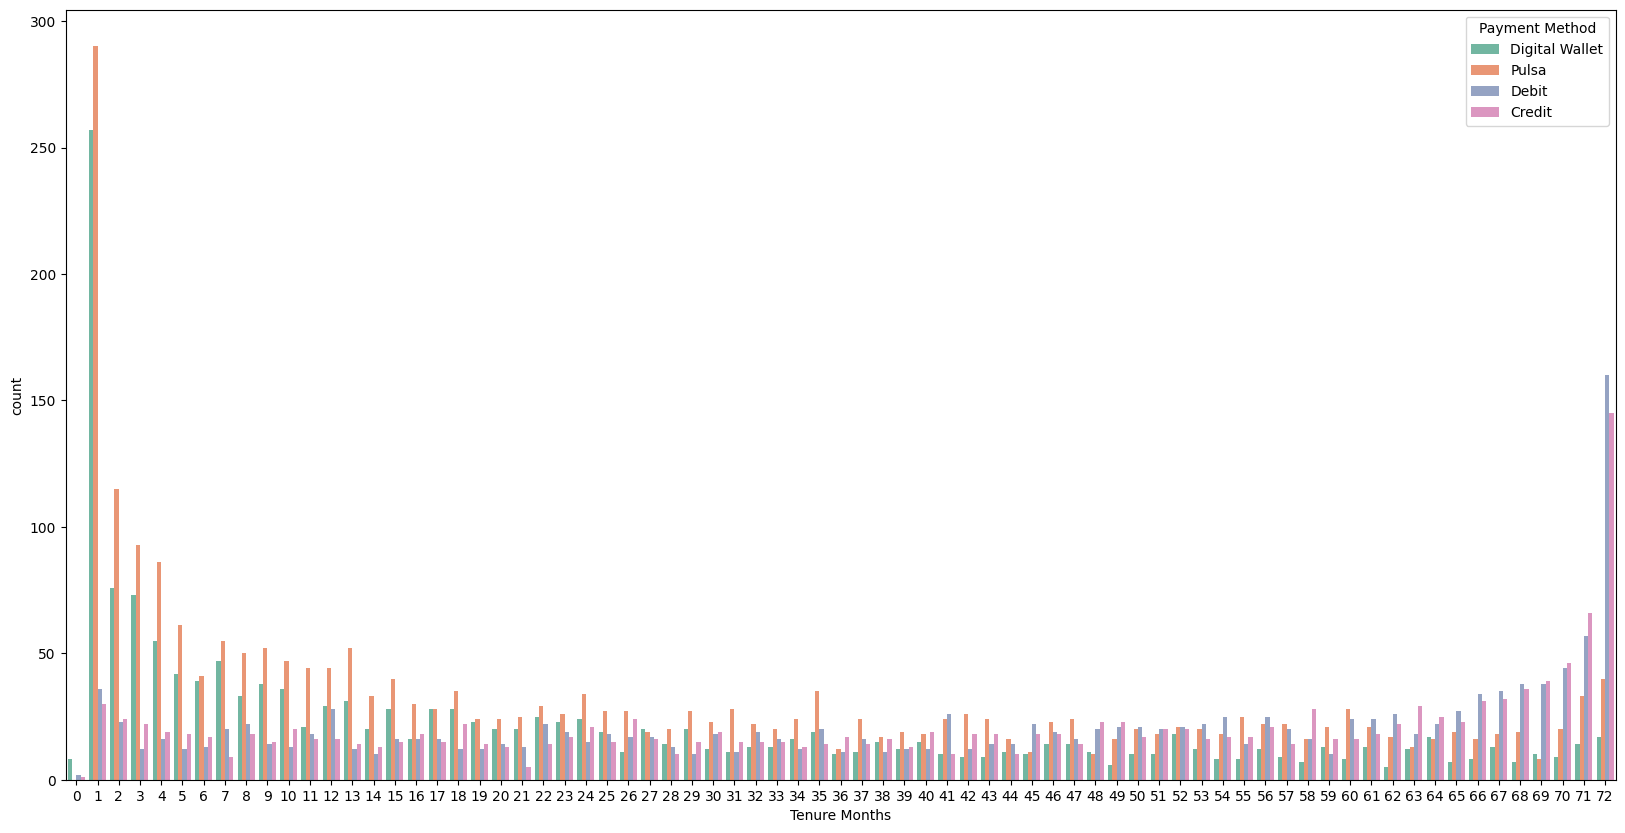

In [60]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_corr['Tenure Months'], hue=df['Payment Method'], palette='Set2')
plt.xlabel('Tenure Months')
plt.show()


In [80]:
# I want to see the churn rate per tenure months per payment method
fig = px.histogram(df, x="Tenure Months", color="Payment Method", facet_col="Churn Label", facet_row="Payment Method",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Tenure Months per Payment Method", title_x=0.5)
fig.show()

In [82]:
df_service = df.copy()

service = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']

for i in service:
    df_service[i] = df_service[i].replace(['No', 'Yes', 'No internet service'], [0, 1, 0])

df_service['service_count'] = df_service[service].sum(axis=1)

df_service.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),service_count
0,0,2,Jakarta,Mid End,1,1,0,0,0,0,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,2
1,1,2,Jakarta,High End,0,0,0,0,0,0,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,0
2,2,8,Jakarta,High End,0,0,1,0,1,1,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,3
3,3,28,Jakarta,High End,0,0,1,1,1,1,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,4
4,4,49,Jakarta,High End,0,1,1,0,1,1,Debit,134.810,Yes,106.816666,-6.2,6942.0,4


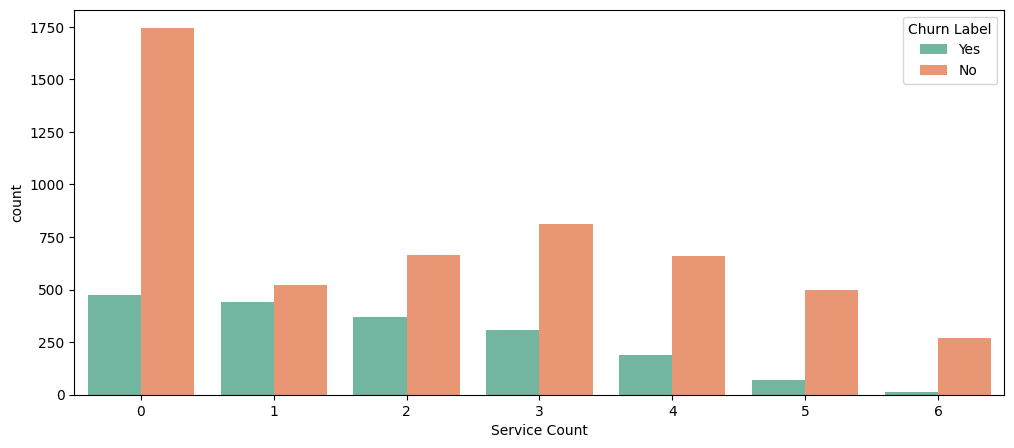

In [83]:
# plot churn vs service count
plt.figure(figsize=(12,5))
sns.countplot(x=df_service['service_count'], hue=df_service['Churn Label'], palette='Set2')
plt.xlabel('Service Count')
plt.show()

This indicates that how much service that customer used isn't important